# **Twitter Sentiment Analysis**

In [1]:
# Link of the CSV File: https://drive.google.com/file/d/1774V7CLtvKHEyr1aHJK1JzO40WhmMLIB/view?usp=sharing

In [2]:
# Importing Required Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

import re
import string

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier

from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning

nltk.download('stopwords')
sw=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# Function for Loading the Dataset.

def load_dataset(filename, cols):
    dataset=pd.read_csv(filename, encoding='latin-1')
    dataset.columns=cols
    return dataset

In [4]:
# Function for Removing the Unwanted Columns in the Dataset.

def remove_unwanted_cols(dataset, cols):
    for col in cols:
        del dataset[col]
    return dataset

In [5]:
# Function for Pre-Processing the Tweet Texts.

def preprocess_tweet_text(tweet):
    tweet.lower()
    # Removing Links (or) URL's.
    tweet=re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)
    # Removing User @ References and '#' from Tweet.
    tweet=re.sub(r'\@\w+|\#', '', tweet)
    # Removing Punctuations.
    tweet=tweet.translate(str.maketrans('', '', string.punctuation))
    # Removeing Stopwords.
    tweet_tokens=word_tokenize(tweet)
    filtered_words=[w for w in tweet_tokens if not w in sw]
    return " ".join(filtered_words)

In [6]:
# Function for Vectorizing Data.

def get_feature_vector(train_fit):
    vector=TfidfVectorizer(sublinear_tf=True)
    vector.fit(train_fit)
    return vector

In [7]:
# Function for Separating Tweets based on their Sentiment(Positive,Neutral,Negative).

def int_to_string(sentiment):
    if sentiment==0:
        return "Negative"
    elif sentiment==2:
        return "Neutral"
    else:
        return "Positive"

In [8]:
import nltk
nltk.download('punkt')
# Loading Dataset.
dataset=load_dataset("/content/drive/MyDrive/Training.csv", ['target', 't_id', 'created_at', 'query', 'user', 'text'])
# Removing Unwanted Columns from Dataset.
n_dataset=remove_unwanted_cols(dataset, ['t_id', 'created_at', 'query', 'user'])
#Pre-Processing the Data.
dataset.text=dataset['text'].apply(preprocess_tweet_text)
# Same tf Vector will be used for Testing Sentiments on Unseen Trending Data.
tf_vector=get_feature_vector(np.array(dataset.iloc[:, 1]).ravel())
X=tf_vector.transform(np.array(dataset.iloc[:, 1]).ravel())
y=np.array(dataset.iloc[:, 0]).ravel()
# Spliting the Dataset into Training Data and Testing Data.
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=30)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Accuracy: 76.82291666666666 %
[[188303  52164]
 [ 59086 180447]]


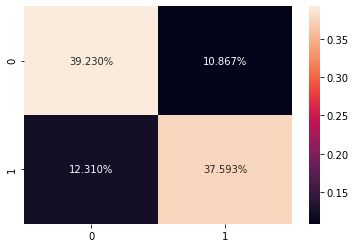

In [9]:
# Training Naive Bayes Model.

NB_model=MultinomialNB()
NB_model.fit(X_train, y_train)
y_predict_nb=NB_model.predict(X_test)
print("Accuracy:",(accuracy_score(y_test, y_predict_nb))*100,"%")
cm=confusion_matrix(y_test,y_predict_nb)
print(cm)
sns.heatmap(cm/np.sum(cm),fmt='.3%',annot=True)

Accuracy: 78.76645833333333 %
[[184251  56216]
 [ 45705 193828]]


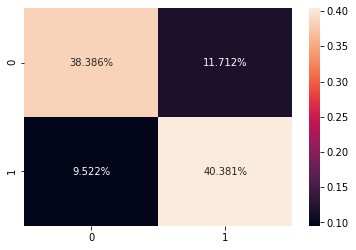

In [11]:
# Training Logistics Regression Model.

LR_model=LogisticRegression(solver='lbfgs')
LR_model.fit(X_train, y_train)
simplefilter("ignore", category=ConvergenceWarning)
y_predict_lr=LR_model.predict(X_test)
print("Accuracy:",(accuracy_score(y_test, y_predict_lr))*100,"%")
cm=confusion_matrix(y_test,y_predict_lr)
print(cm)
sns.heatmap(cm/np.sum(cm),fmt='.3%',annot=True)